In [8]:
# Importin the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Importing the Dataset
data = pd.read_csv('AB_NYC_2019.csv')

In [10]:
# Preview of data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
# Checking for null values
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# dropping columns that can not be handled
data = data.drop(columns=['last_review', 'reviews_per_month'])

In [13]:
# Handling missing values
data.dropna(inplace=True)  # Remove rows with missing values

In [15]:
# removing duplicate values from the -Must be Unique- Column: name
clean_data = data.drop_duplicates(subset=['name'], keep='first')

In [18]:
# Detecting outliers
Q1 = clean_data['price'].quantile(0.1)
Q3 = clean_data['price'].quantile(0.9)
IQR = Q3 - Q1
outliers = clean_data[(clean_data['price'] < Q1 - 1.5 * IQR) | (clean_data['price'] > Q3 + 1.5 * IQR)]

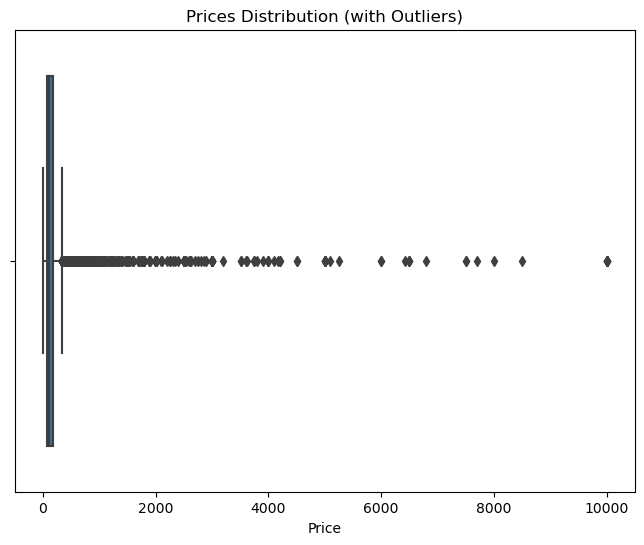

In [19]:
# Visualize outliers (optional)
plt.figure(figsize=(8, 6))
sns.boxplot(x=clean_data['price'])
plt.title('Prices Distribution (with Outliers)')
plt.xlabel('Price')
plt.show()